In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML,display
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None) # to show maximum number of columns

In [3]:
df = pd.read_csv('laptop_data.csv')

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.shape

(1303, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


###  Remove Unnamed: 0 column

In [10]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
df.head(2) 

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


###  Remove GB from RAM column 

In [12]:
df['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [13]:
df['Ram']=df['Ram'].str.replace('GB','')
df.head(2) 

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


### Remove KG from Weight column 

In [14]:
df['Weight'].value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
1.18kg      1
1.19kg      1
4.7kg       1
3.4kg       1
1.31kg      1
Name: Weight, Length: 179, dtype: int64

In [15]:
df['Weight']=df['Weight'].str.replace('kg','')
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


### Convert RAM and Weight column into numeric values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [17]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Perfrom EDA

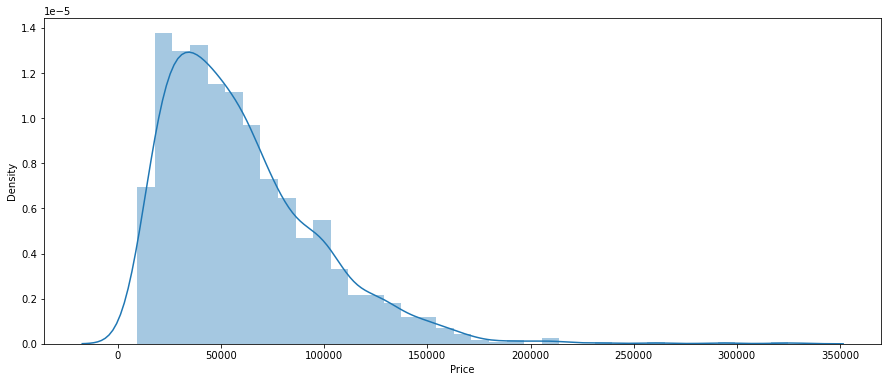

In [19]:
plt.figure(figsize=(15,6))
sns.distplot(df['Price'])
plt.show()

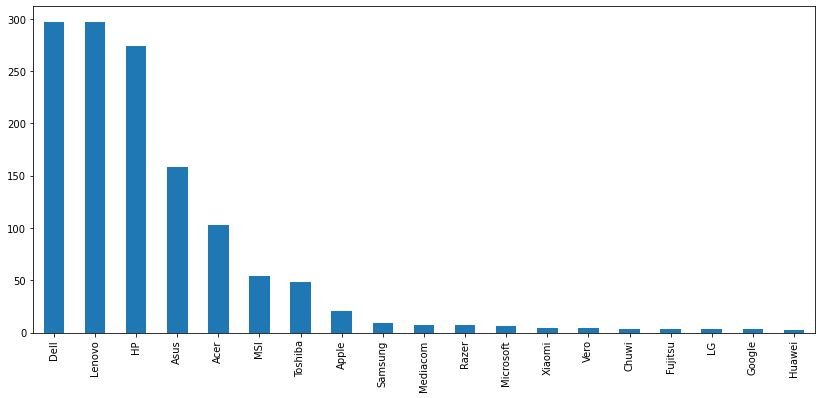

In [20]:
plt.figure(figsize=(14,6))
df['Company'].value_counts().plot(kind='bar')
plt.show()

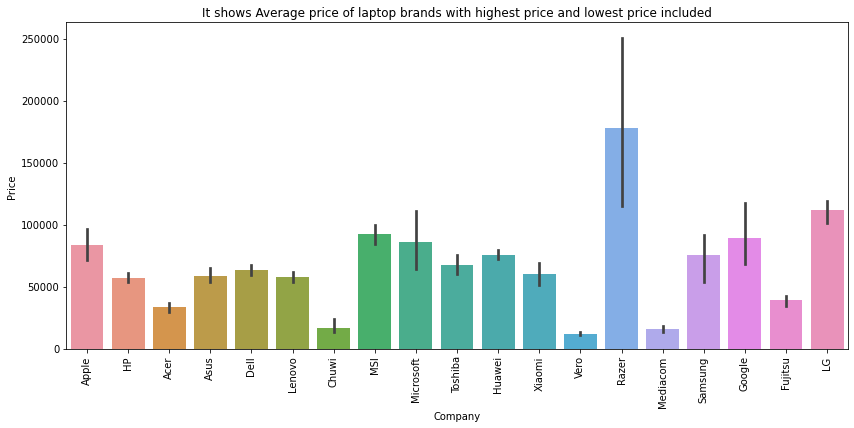

In [21]:
plt.figure(figsize=(14,6))
sns.barplot(x = df['Company'],y= df['Price'])
plt.xticks(rotation='vertical')
plt.title('It shows Average price of laptop brands with highest price and lowest price included')
plt.show()

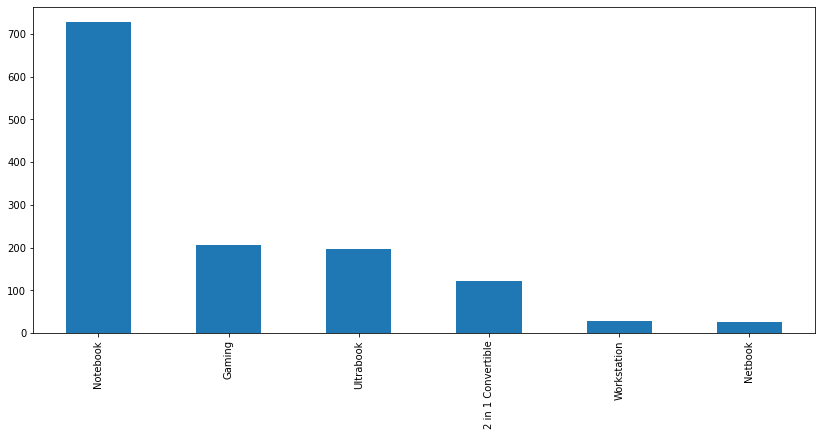

In [22]:
plt.figure(figsize=(14,6))
df['TypeName'].value_counts().plot(kind='bar')
plt.show()

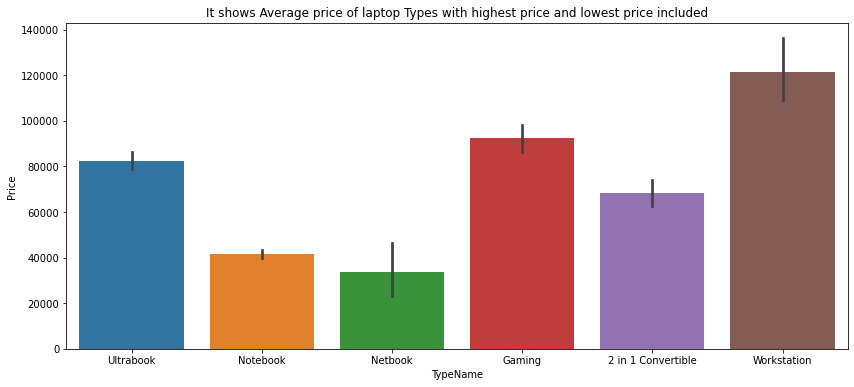

In [23]:
plt.figure(figsize=(14,6))
sns.barplot(x = df['TypeName'],y= df['Price'])
# plt.xticks(rotation='vertical')
plt.title('It shows Average price of laptop Types with highest price and lowest price included')
plt.show()

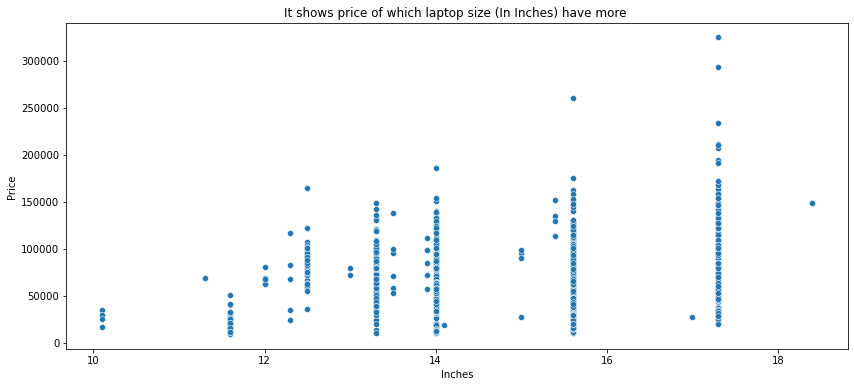

In [24]:
plt.figure(figsize=(14,6))
sns.scatterplot(x = df['Inches'],y= df['Price'])
# plt.xticks(rotation='vertical')
plt.title('It shows price of which laptop size (In Inches) have more ')
plt.show()

In [25]:
df['ScreenResolution'].value_counts() 

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x1440               

### we have using above information to extract insights from ScreenResolution column

In [26]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [27]:
df.sample(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
287,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.7,52054.56,0


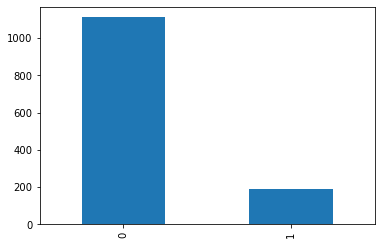

In [28]:
df['Touchscreen'].value_counts().plot(kind='bar')
plt.show()

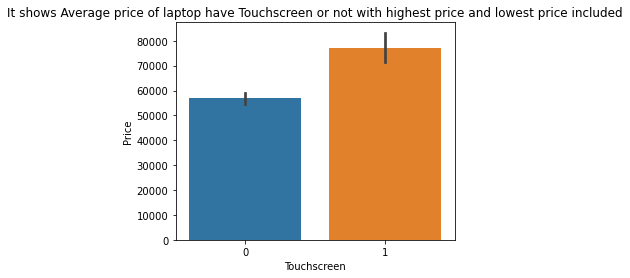

In [29]:
plt.figure(figsize=(5,4))
sns.barplot(x = df['Touchscreen'],y= df['Price'])
# plt.xticks(rotation='vertical')
plt.title('It shows Average price of laptop have Touchscreen or not with highest price and lowest price included')
plt.show()

In [30]:
df['IPSdisplay'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [31]:
df.sample(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSdisplay
804,Dell,Netbook,11.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,128GB SSD,Intel HD Graphics 505,Windows 10,1.63,39640.32,0,0


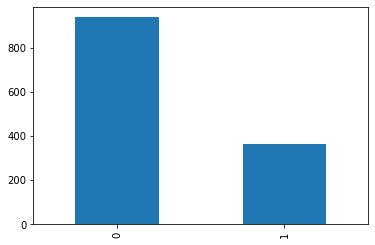

In [32]:
df['IPSdisplay'].value_counts().plot(kind='bar')
plt.show()

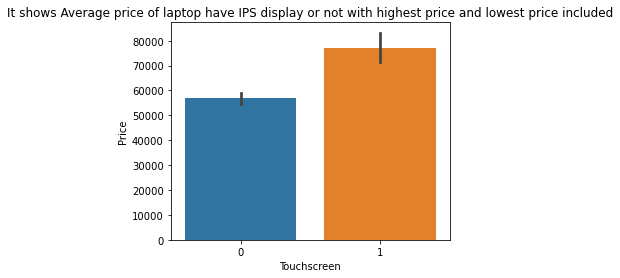

In [33]:
plt.figure(figsize=(5,4))
sns.barplot(x = df['Touchscreen'],y= df['Price'])
# plt.xticks(rotation='vertical')
plt.title('It shows Average price of laptop have IPS display or not with highest price and lowest price included')
plt.show()

### screen resolution extract with new column

In [34]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [35]:
df['X_resolution'] = new[0]
df['Y_resolution'] = new[1]

In [36]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSdisplay,X_resolution,Y_resolution
593,Samsung,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.5,90522.72,0,0,Full HD 1920,1080
279,Lenovo,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,2TB HDD,Nvidia GeForce MX150,No OS,2.8,45234.72,0,0,Full HD 1920,1080


In [37]:
df['X_resolution'] = df['X_resolution'].str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [38]:
df['X_resolution'] = df['X_resolution'].astype('int')
df['Y_resolution'] = df['Y_resolution'].astype('int')

In [39]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSdisplay,X_resolution,Y_resolution
611,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,46833.6528,0,0,1920,1080
355,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.02,51729.5520,0,0,1920,1080


##### Correlation with price which has X_resolution and Y_resolution have high correlation that's why we create x and y resolution column


In [40]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPSdisplay      0.252208
X_resolution    0.556529
Y_resolution    0.552809
Name: Price, dtype: float64

In [41]:
# Find PPI (pixel per inches ) which is important to predict price
df['PPI'] = ((((df['X_resolution']**2) + (df['Y_resolution']**2))**0.5)/df['Inches']).astype('float')

In [42]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPSdisplay      0.252208
X_resolution    0.556529
Y_resolution    0.552809
PPI             0.473487
Name: Price, dtype: float64

#####  We drop Screeresolution , x_resoulution, y_resoultion  and inches column coz, we have PPI, touchscreen,IPSdisplay column

In [43]:
df.drop(columns=['ScreenResolution','X_resolution','Y_resolution','Inches'],inplace=True)

In [44]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSdisplay,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


# Now, We Focus on CPU column

In [45]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Atom Z8350 1.92GHz                  1
Intel Core i5 2.9GHz                      1
AMD FX 9830P 3GHz                         1
Intel Core i5 7200U 2.70GHz               1
Intel Pentium Dual Core N4200 1.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [46]:
df['Cpu name'] = df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSdisplay,PPI,Cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [48]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [49]:
df['Cpu brand'] = df['Cpu name'].apply(fetch_processor) 

<AxesSubplot:>

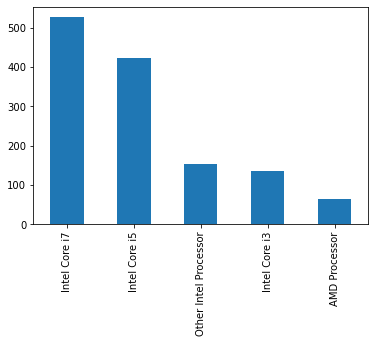

In [50]:
df['Cpu brand'].value_counts().plot(kind='bar')

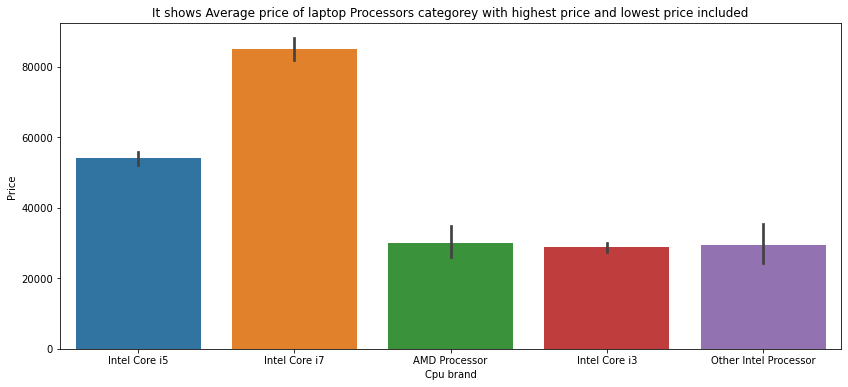

In [51]:
plt.figure(figsize=(14,6))
sns.barplot(x = df['Cpu brand'],y= df['Price'])
# plt.xticks(rotation='vertical')
plt.title('It shows Average price of laptop Processors categorey with highest price and lowest price included')
plt.show()

In [52]:
df.drop(columns=['Cpu','Cpu name'],inplace=True)

In [53]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSdisplay,PPI,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


# Now, Focus on RAM column

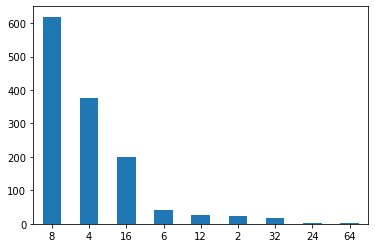

In [54]:
df['Ram'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.show()

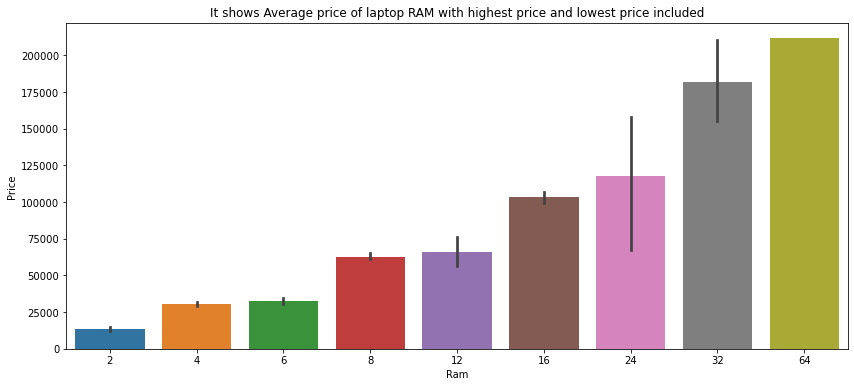

In [55]:
plt.figure(figsize=(14,6))
sns.barplot(x = df['Ram'],y= df['Price'])
# plt.xticks(rotation='vertical')
plt.title('It shows Average price of laptop RAM with highest price and lowest price included')
plt.show()

In [56]:
df.sample(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSdisplay,PPI,Cpu brand
610,Lenovo,Notebook,32,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.50,261018.72,0,1,282.423996,Other Intel Processor
488,Lenovo,Ultrabook,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.36,95797.44,0,1,176.232574,Intel Core i7
647,Razer,Gaming,16,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,138474.72,0,0,157.350512,Intel Core i7


# Now, Focus on MEMOREY column

In [57]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [58]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSdisplay,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1162,HP,Gaming,8,1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,47898.720,0,1,141.211998,Intel Core i7,1000,0,0,0
79,HP,Notebook,8,128 SSD + 1000 HDD,Nvidia GeForce 930MX,Windows 10,2.50,52054.560,0,0,127.335675,Intel Core i5,1000,128,0,0
96,Dell,Notebook,8,1000 HDD,AMD Radeon R5 M430,Linux,2.20,31962.672,0,0,141.211998,Intel Core i7,1000,0,0,0
432,Lenovo,Notebook,4,128 SSD,Intel HD Graphics 620,Windows 10,1.70,31914.720,0,1,157.350512,Intel Core i3,0,128,0,0
1176,Lenovo,Notebook,4,1000 Hybrid,Intel HD Graphics 520,Windows 7,2.32,43956.000,0,0,141.211998,Intel Core i7,0,0,1000,0


In [59]:
df.drop(columns=['Memory'],inplace=True)

In [60]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPSdisplay,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [61]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPSdisplay       0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [62]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [63]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPSdisplay,PPI,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


# Now, we focus on GPU column

In [64]:
df['Gpu'].value_counts()

Intel HD Graphics 620       281
Intel HD Graphics 520       185
Intel UHD Graphics 620       68
Nvidia GeForce GTX 1050      66
Nvidia GeForce GTX 1060      48
                           ... 
Intel HD Graphics 540         1
AMD Radeon Pro 455            1
ARM Mali T860 MP4             1
AMD Radeon Pro 555            1
Nvidia GeForce GTX 930MX      1
Name: Gpu, Length: 110, dtype: int64

In [65]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [66]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [67]:
df = df[df['Gpu brand'] != 'ARM']

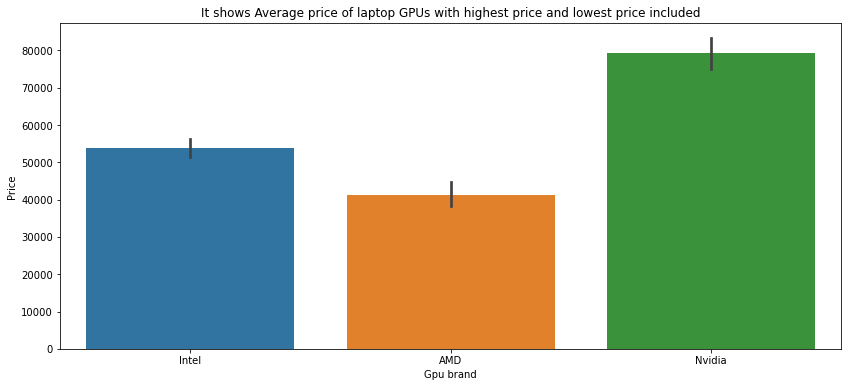

In [68]:
plt.figure(figsize=(14,6))
sns.barplot(x = df['Gpu brand'],y= df['Price'])
# plt.xticks(rotation='vertical')
plt.title('It shows Average price of laptop GPUs with highest price and lowest price included')
plt.show()

In [69]:
df.drop(columns=['Gpu'],inplace=True)

In [70]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPSdisplay,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


# Now, we focus on OpSys (operating system) column

<AxesSubplot:>

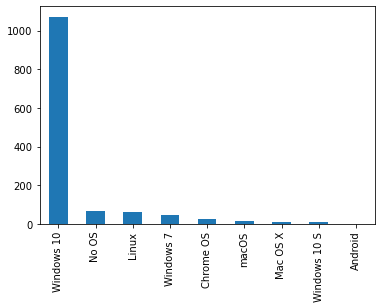

In [71]:
df['OpSys'].value_counts().plot(kind='bar')

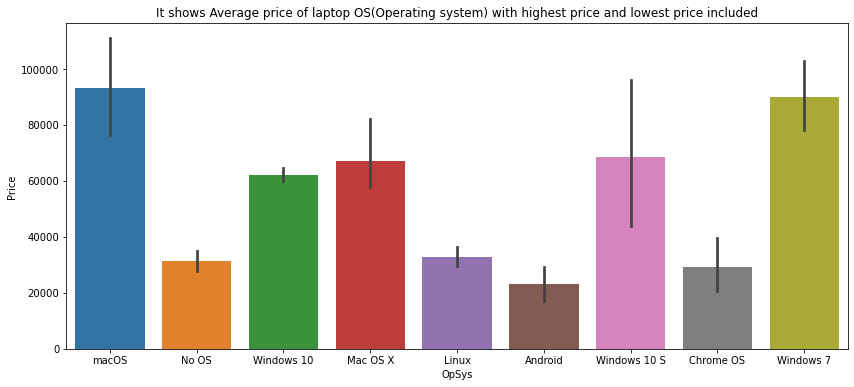

In [72]:
plt.figure(figsize=(14,6))
sns.barplot(x = df['OpSys'],y= df['Price'])
# plt.xticks(rotation='vertical')
plt.title('It shows Average price of laptop OS(Operating system) with highest price and lowest price included')
plt.show()

In [73]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [74]:
df['os'] = df['OpSys'].apply(cat_os)

In [75]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPSdisplay,PPI,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [76]:
df.drop(columns=['OpSys'],inplace=True)

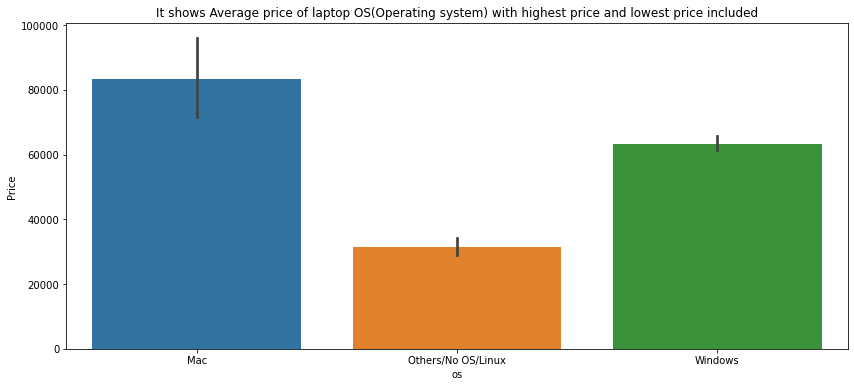

In [77]:
plt.figure(figsize=(14,6))
sns.barplot(x = df['os'],y= df['Price'])
# plt.xticks(rotation='vertical')
plt.title('It shows Average price of laptop OS(Operating system) with highest price and lowest price included')
plt.show()

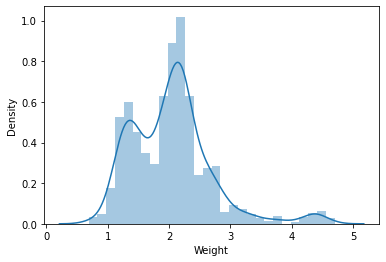

In [78]:
sns.distplot(df['Weight'])
plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Price'>

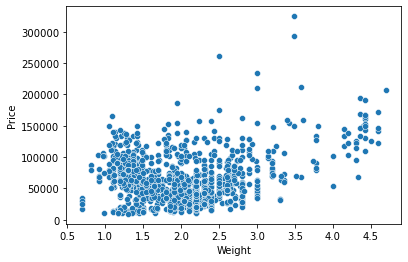

In [79]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

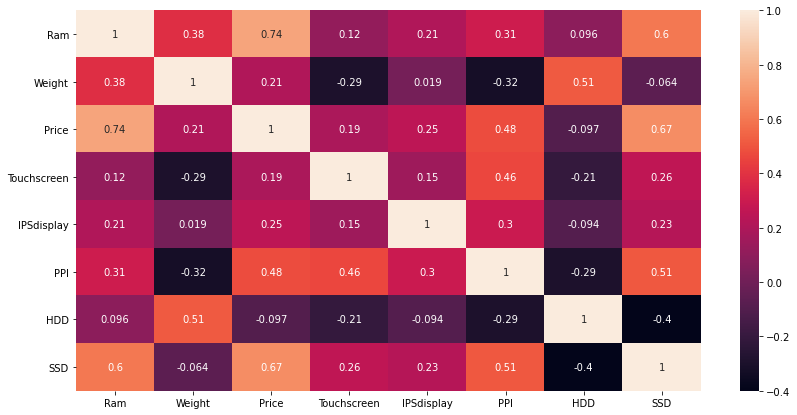

In [80]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

# We focus on PRICE column

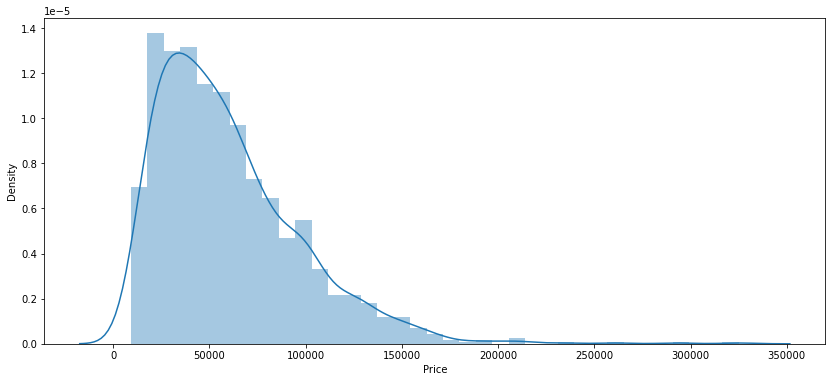

In [81]:
plt.figure(figsize=(14,6))
sns.distplot(df['Price'])
plt.show()

#### our above target column is right side skewd which is going to trouble for our prediction model so, 
####  we have to Normalize PRICE column for better prediction
####  we apply log transforamtion to normalize

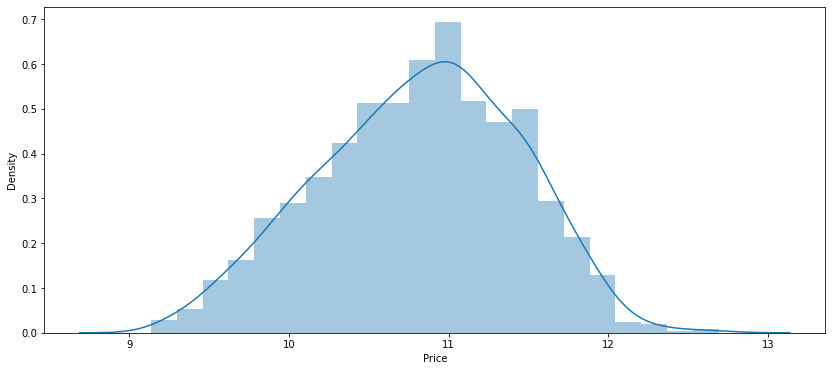

In [82]:
plt.figure(figsize=(14,6))
sns.distplot(np.log(df['Price'])) 
plt.show()

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [84]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Apply All models one by one

In [85]:
dataset = df.copy()

In [86]:
dataset.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPSdisplay,PPI,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


In [115]:
X = dataset.drop(columns=['Price'])
y = np.log(dataset['Price'])

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

# Linear regression model

In [117]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

display(HTML(f'R2 Score is <b>{round(r2_score(y_test,y_pred)*100,2)}</b>%')) # accurecy
display(HTML(f'Mean Absolute Error (MAE) is <b>{round(mean_absolute_error(y_test,y_pred),6)}</b>'))

# Ridge Regression

In [118]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

display(HTML(f'R2 Score is <b>{round(r2_score(y_test,y_pred)*100,2)}</b>%')) # accurecy
display(HTML(f'Mean Absolute Error (MAE) is <b>{round(mean_absolute_error(y_test,y_pred),6)}</b>'))

# Lasso Regression

In [119]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

display(HTML(f'R2 Score is <b>{round(r2_score(y_test,y_pred)*100,2)}</b>%')) # accurecy
display(HTML(f'Mean Absolute Error (MAE) is <b>{round(mean_absolute_error(y_test,y_pred),6)}</b>'))

# KNN

In [120]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

display(HTML(f'R2 Score is <b>{round(r2_score(y_test,y_pred)*100,2)}</b>%')) # accurecy
display(HTML(f'Mean Absolute Error (MAE) is <b>{round(mean_absolute_error(y_test,y_pred),6)}</b>'))

# Decision Tree

In [121]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

display(HTML(f'R2 Score is <b>{round(r2_score(y_test,y_pred)*100,2)}</b>%')) # accurecy
display(HTML(f'Mean Absolute Error (MAE) is <b>{round(mean_absolute_error(y_test,y_pred),6)}</b>'))

# SVM

In [122]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

display(HTML(f'R2 Score is <b>{round(r2_score(y_test,y_pred)*100,2)}</b>%')) # accurecy
display(HTML(f'Mean Absolute Error (MAE) is <b>{round(mean_absolute_error(y_test,y_pred),6)}</b>'))

# ExtraTrees

In [123]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

display(HTML(f'R2 Score is <b>{round(r2_score(y_test,y_pred)*100,2)}</b>%')) # accurecy
display(HTML(f'Mean Absolute Error (MAE) is <b>{round(mean_absolute_error(y_test,y_pred),6)}</b>'))

# AdaBoost

In [124]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

display(HTML(f'R2 Score is <b>{round(r2_score(y_test,y_pred)*100,2)}</b>%')) # accurecy
display(HTML(f'Mean Absolute Error (MAE) is <b>{round(mean_absolute_error(y_test,y_pred),6)}</b>'))

# Gredient Boost

In [125]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

display(HTML(f'R2 Score is <b>{round(r2_score(y_test,y_pred)*100,2)}</b>%')) # accurecy
display(HTML(f'Mean Absolute Error (MAE) is <b>{round(mean_absolute_error(y_test,y_pred),6)}</b>'))

# XGBoost

In [126]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

display(HTML(f'R2 Score is <b>{round(r2_score(y_test,y_pred)*100,2)}</b>%')) # accurecy
display(HTML(f'Mean Absolute Error (MAE) is <b>{round(mean_absolute_error(y_test,y_pred),6)}</b>'))

# Random Forest

In [127]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

display(HTML(f'R2 Score is <b>{round(r2_score(y_test,y_pred)*100,2)}</b>%')) # accurecy
display(HTML(f'Mean Absolute Error (MAE) is <b>{round(mean_absolute_error(y_test,y_pred),6)}</b>'))

# *********** As usual RANDOM FOREST gives best accurecy *********** 

#### At the end we have to convert log price into exp price for converted into orignal value

In [128]:
prices = {'Log Price':[],'Orignal Price':[]}
expy = np.exp(y) 
for i,j in zip(y,expy):
    prices['Log Price'].append(i)
    prices['Orignal Price'].append(j)
prices = pd.DataFrame(prices)
prices.sample(5)

,Log Price,Orignal Price
641,10.231119,27753.5520
30,9.476778,13053.0672
299,11.267217,78215.0400
316,11.778996,130482.7200
447,11.572957,106187.0400


## Now, we save the model for deployment